In [ ]:
#Importing the necessary packages
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In [ ]:
# reading the dataset using pandas
df=pd.read_csv("/content/creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114957,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114958,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114959,73690,1.255655,0.293362,0.288616,0.701727,-0.447134,-1.093442,0.029565,-0.155947,0.160172,...,-0.297287,-0.898954,0.139494,0.322281,0.187536,0.097228,-0.028586,0.029014,1.79,0.0
114960,73690,1.270638,-0.089535,-0.990690,-0.375303,0.652307,-0.073908,0.394543,-0.164288,-0.317251,...,-0.067492,-0.344301,-0.372630,-1.296908,0.731021,1.152123,-0.131651,-0.024591,75.00,0.0
114961,73691,1.295784,0.049457,-1.301814,-0.476648,2.131357,3.184446,-0.494416,0.802781,-0.075014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the data the variables v1 -v28 are the transaction made by the customers.Accessing the orginal data leads to less data security. So the data set is shared after performing PCA



####  Exploratory Data Analysis 

In [ ]:
#finding the number of rows and colums in the datset
df.shape

(114962, 31)

In [ ]:
# finding the types of classes
df.Class.value_counts()

0.0    114719
1.0       242
Name: Class, dtype: int64

In [ ]:
#this gives some information abot the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

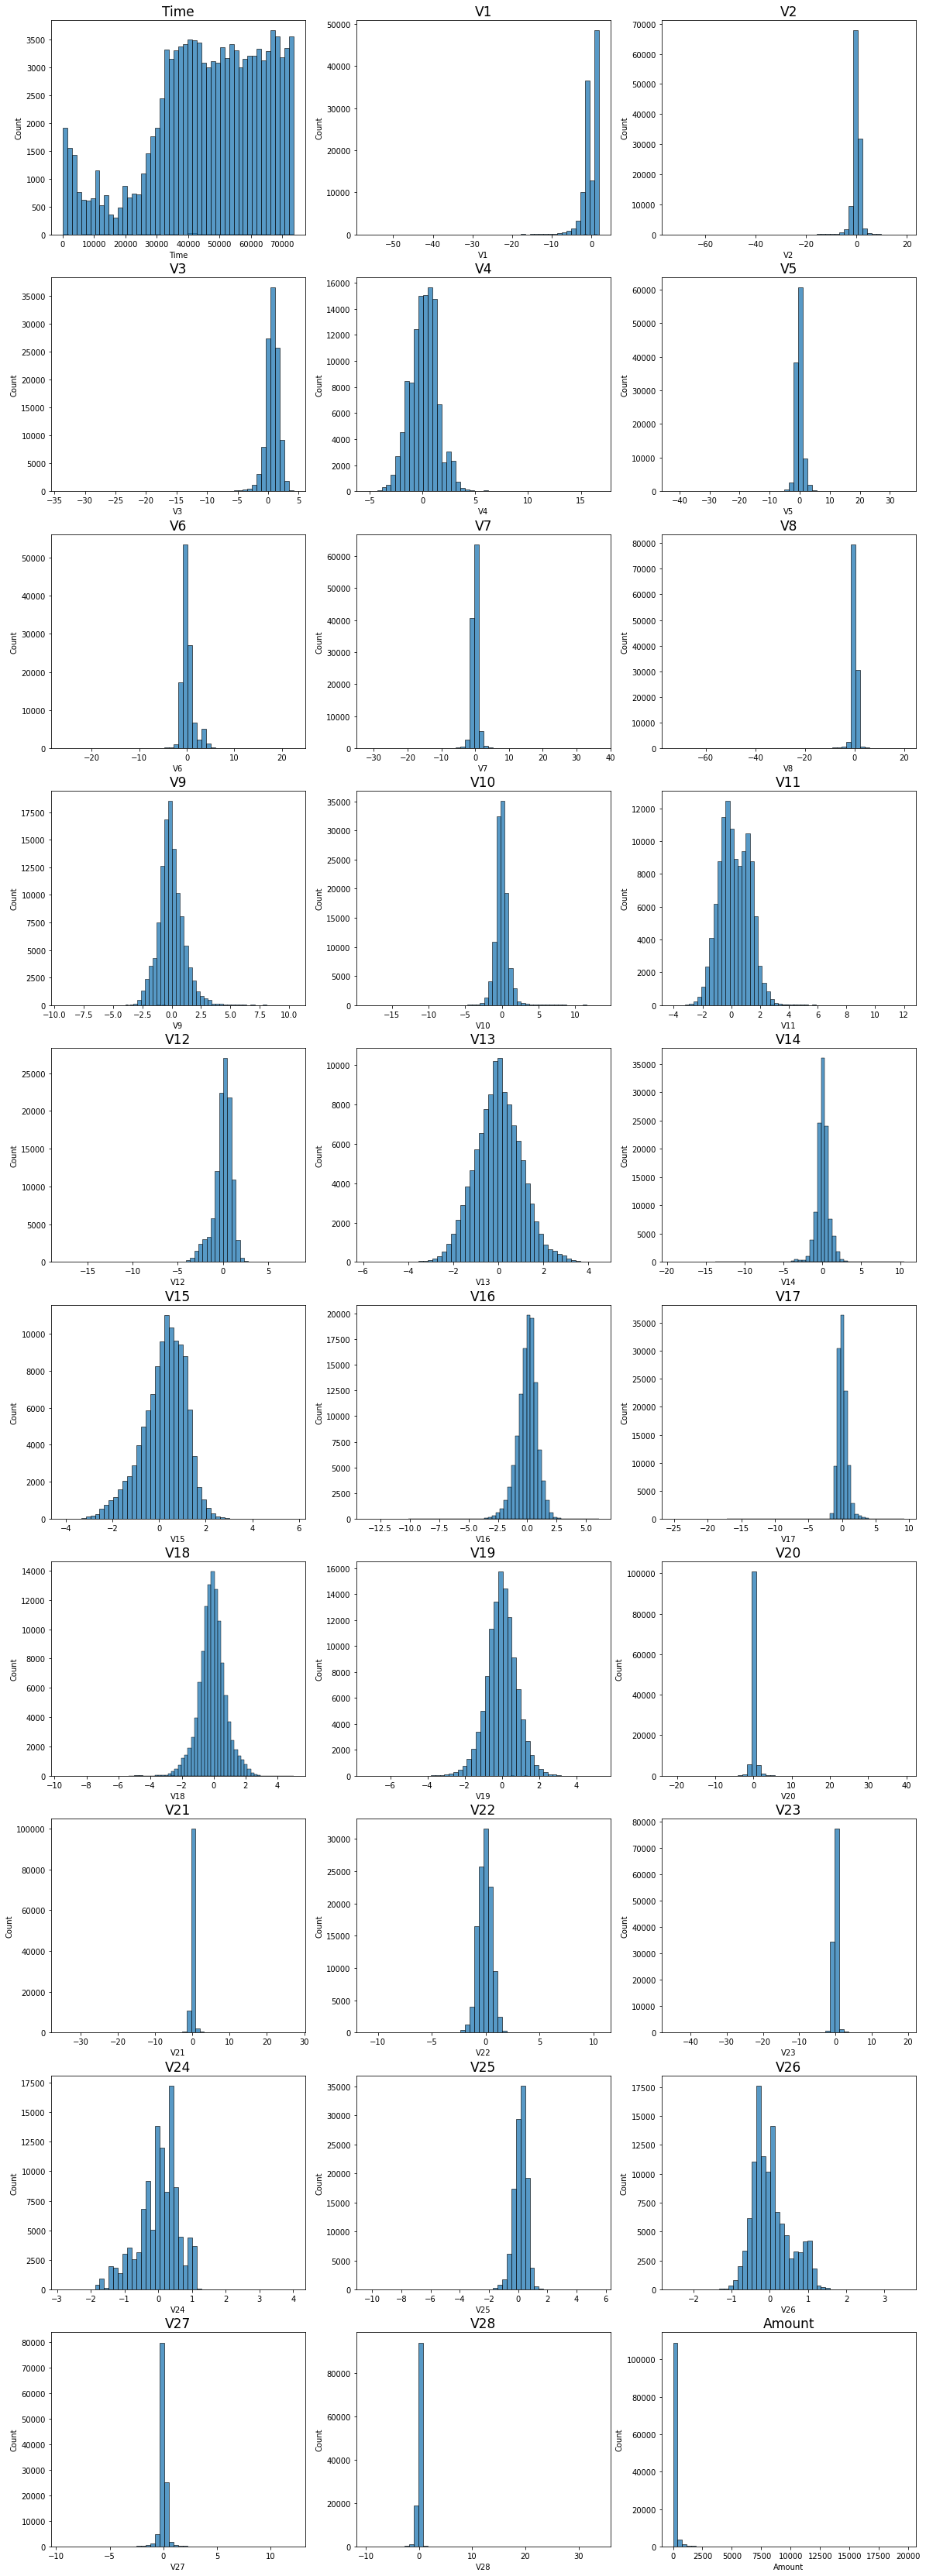

In [ ]:
# cheking the skewness for the different transaction with respect to count
regular_records= df.Class == 0
fraudulant_records = df.Class == 1

#creating a histogram plot
plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col][df.Class == 1], bins=50)
    sns.histplot(df[col][df.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

Here the histogram plot is used to summarize discrete or continuous data that are measured on an interval scale

In [ ]:
#grouping the data with classes to see the difference between the fraud and original transacions
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                        \
          count          mean           std    min       25%      50%   
Class                                                                   
0.0    114719.0  46095.931415  18493.327716    0.0  35152.50  47942.0   
1.0       242.0  39270.280992  19195.603847  406.0  25700.25  41230.0   

                           Amount                                             \
           75%      max     count        mean         std  min   25%     50%   
Class                                                                          
0.0    61149.0  73690.0  114719.0   94.859137  257.024232  0.0  6.99  25.000   
1.0    55617.0  73408.0     242.0  119.435331  254.330814  0.0  1.00   8.565   

                        
         75%       max  
Class                   
0.0    85.25  19656.53  
1.0    99.99   1809.68

From the result we can infer the fraud transaction has lower amount comparing to the noraml transactions

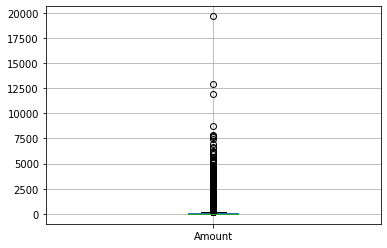

In [ ]:
df.boxplot('Amount')

This boxplot of amount gives the outliers present in it and shows a clear view of it.

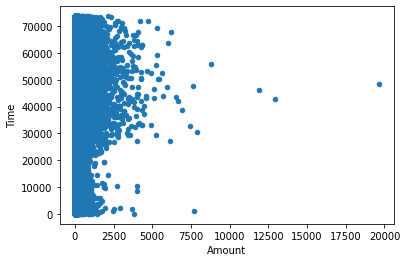

In [ ]:
# creating a plot for amount of transaction with respect to time in normal transaction
df[df.Class == 0].plot.scatter('Amount','Time')


Here the plot gives the amount of transaction with respect to time in normal transaction

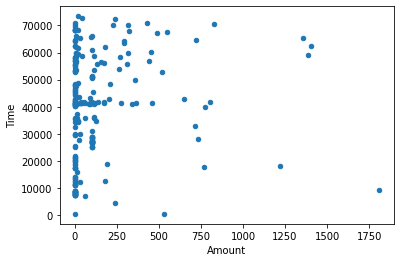

In [ ]:
# creating a plot for amount of transaction with respect to time in fraud transaction
df[df.Class == 1].plot.scatter('Amount','Time')

This plot gives the amount of transaction with respect to time in fraud transaction

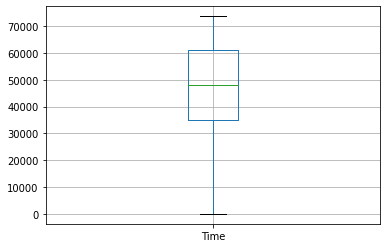

In [ ]:

df.boxplot('Time')

The above plot is the box plot which gives the plot of time

# #### Feature extraction


In [ ]:
#removing the infinte values from the dataset so that it won't cause any errors during feature extracions
df= df[np.all(np.isfinite(df), axis=1)]

In [ ]:
#dividing the a and b variables for performing feature extractions
a = df.drop('Class', axis=1)
b=df.Class.values

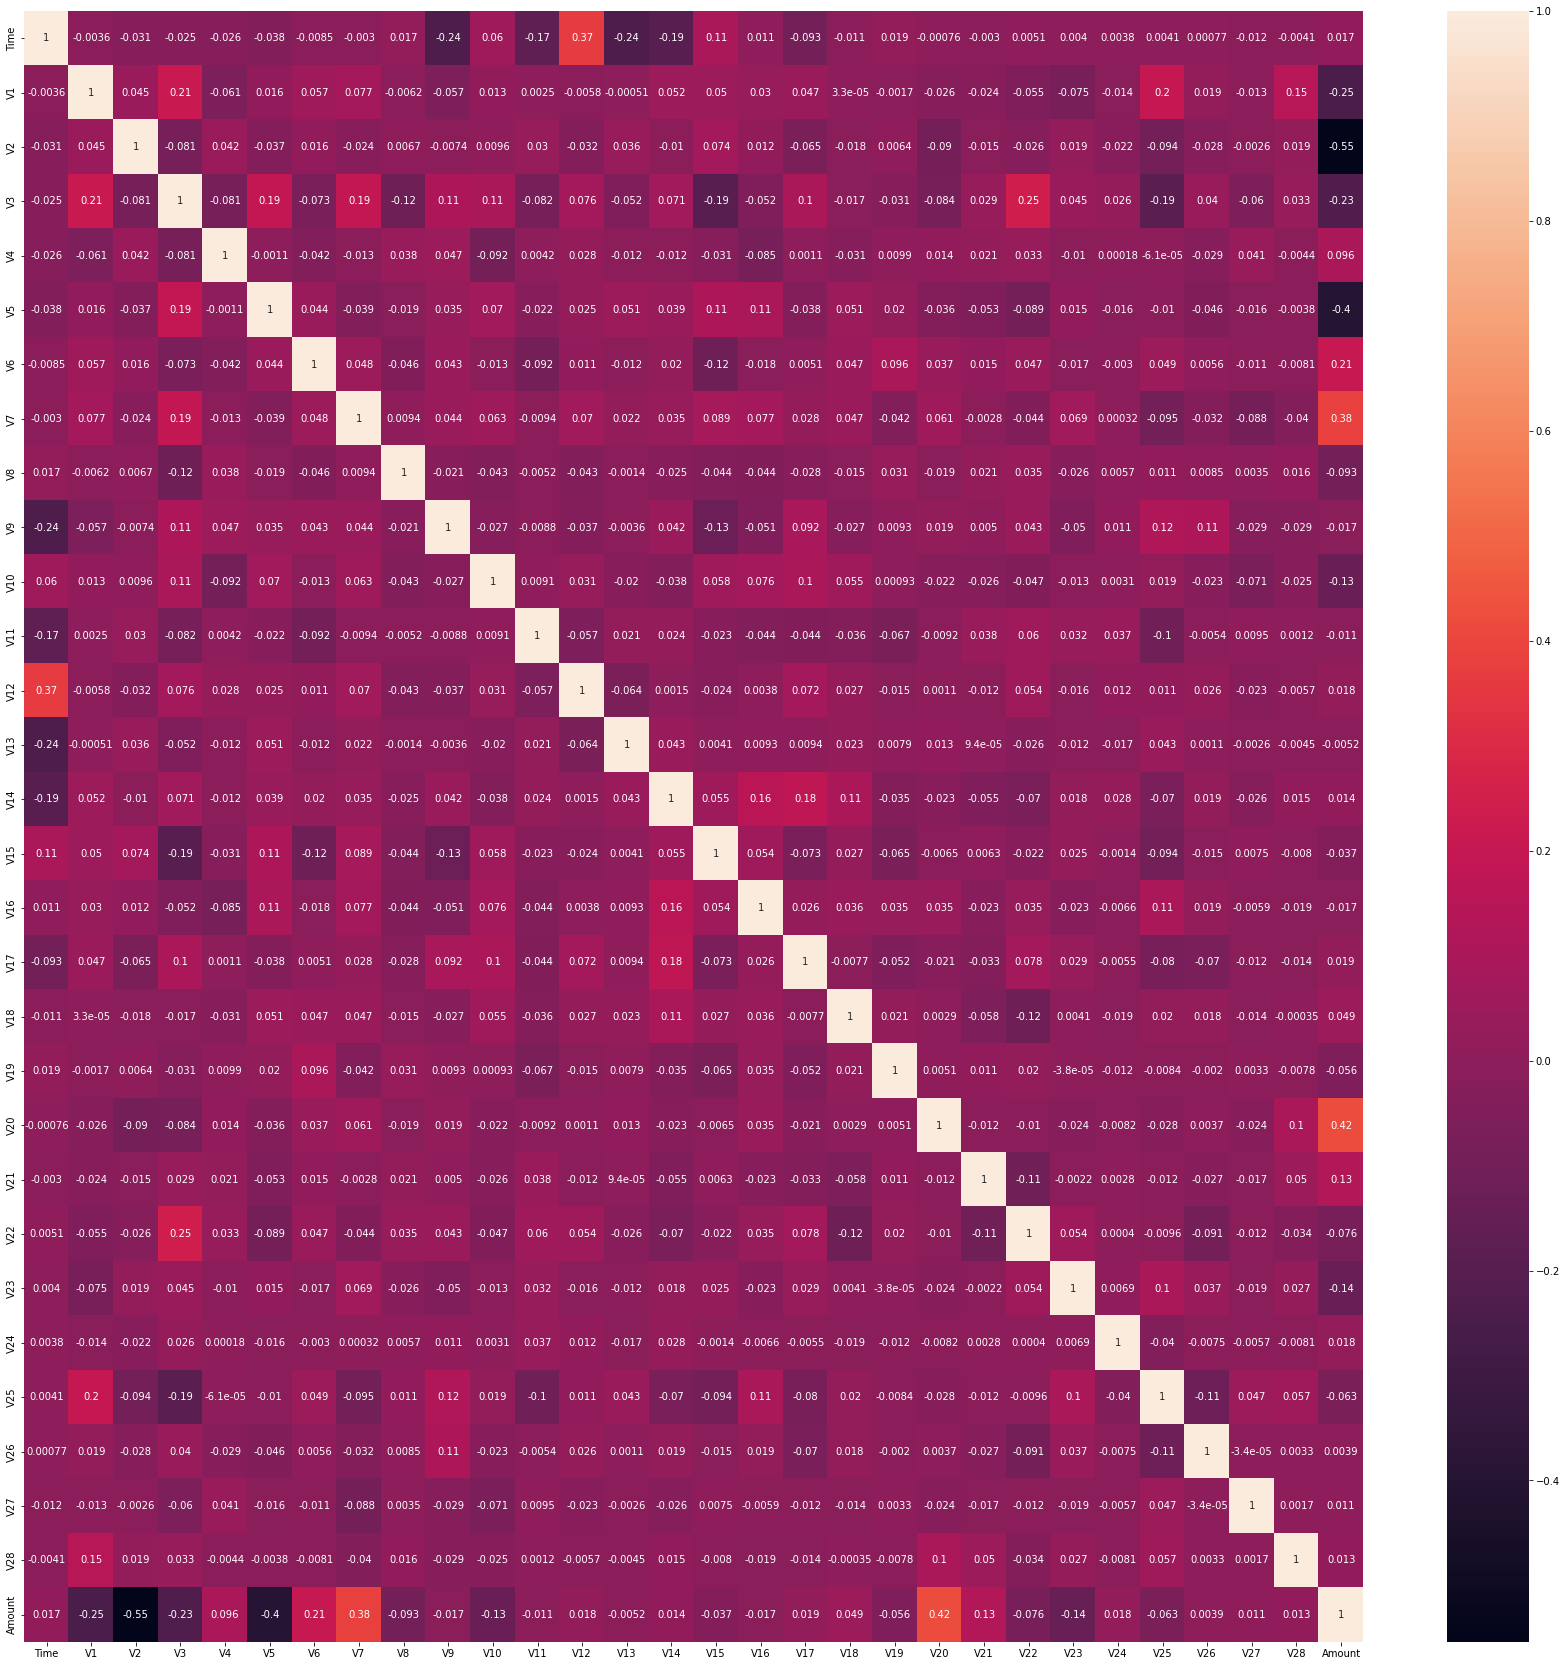

In [ ]:
corr_matrix = a.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

The correlation shows the relationship between the variables and we cannot remove any variables.

In [ ]:
# Handling Inbalance data.
counter = df.Class.value_counts()
print(counter)
print(f'legimate {(counter[0] / sum(counter))*100}% and Fraudent {(counter[1] / sum(counter))*100}%')

0.0    114719
1.0       242
Name: Class, dtype: int64
legimate 99.78949382834179% and Fraudent 0.21050617165821453%


In [ ]:
df = df.reset_index()

Finding the Feature Importance

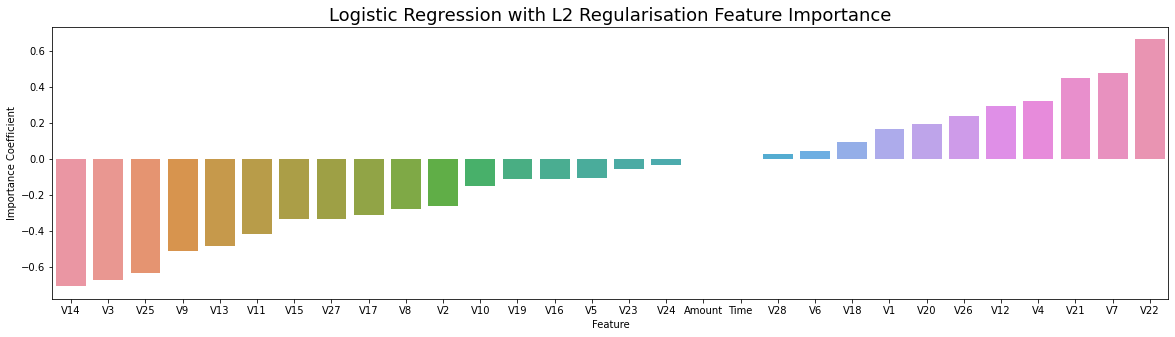

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(a,b)

# coefficient matrix
coefficients = pd.concat([pd.DataFrame(a.columns),pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

There are no sifnificant with amount and time with class as expected. lets remove those columns

In [ ]:
a.drop(['Time','Amount'], axis=1, inplace=True)

#### Resampling 

The given data contains only 0.41% of fraud transaction comparing to the entire datset. So it is hard to perfrom model trainig with the unbalanced dataset. So resampling technique is performed for making the datset balanced

In [ ]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
df_leg = df[df.Class == 0]
df_fraud = df[df.Class == 1]

no_of_samples = round(df_leg.shape[0] * 0.05) #choosing 5% of data from normal transaction dataset
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(df_leg, n_samples=no_of_samples, random_state=15)
df_sampled = pd.concat([leg_df_2,df_fraud],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42) #overampling fraud transaction

x,y = ros.fit_resample(x_sampled,y_sampled)

In [ ]:
y.value_counts()

0.0    5736
1.0    5736
Name: Class, dtype: int64

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y, stratify=y, random_state=12)
train_y.value_counts(), test_y.value_counts()

(1.0    4302
 0.0    4302
 Name: Class, dtype: int64, 1.0    1434
 0.0    1434
 Name: Class, dtype: int64)

#### Defining Evaluation criteria


To optimize the code usage the below functions are created for evaluating the modles

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

In [ ]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [ ]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()
    



```
# This is formatted as code
```

#### Using Logistic Regression

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.947350069735007
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1434
         1.0       0.97      0.92      0.95      1434

    accuracy                           0.95      2868
   macro avg       0.95      0.95      0.95      2868
weighted avg       0.95      0.95      0.95      2868



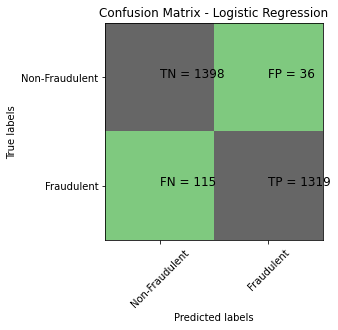

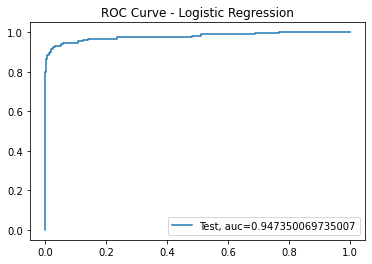

In [ ]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(train_x,train_y)
pred1 = lr_model.predict(test_x)
prob1 = lr_model.predict_proba(test_x)
print_results("Logistic Regression", test_y, pred1,prob1[:,-1])

#### Using Bernoulli Naive Bayes Classifier

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.9239888423988842
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1434
         1.0       1.00      0.85      0.92      1434

    accuracy                           0.92      2868
   macro avg       0.93      0.92      0.92      2868
weighted avg       0.93      0.92      0.92      2868



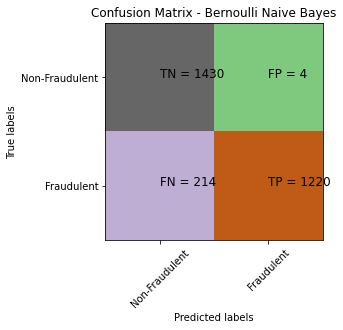

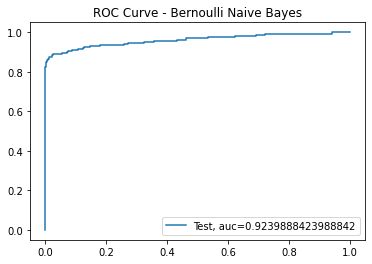

In [ ]:
from sklearn.naive_bayes import BernoulliNB
gnb_model = BernoulliNB()
gnb_model.fit(train_x,train_y)
pred3 = gnb_model.predict(test_x)
prob3 = gnb_model.predict_proba(test_x)
print_results("Bernoulli Naive Bayes", test_y, pred3,prob3[:,-1])

#### Using Random Forest Classifier

Random Forest Classifier
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1434
         1.0       1.00      1.00      1.00      1434

    accuracy                           1.00      2868
   macro avg       1.00      1.00      1.00      2868
weighted avg       1.00      1.00      1.00      2868



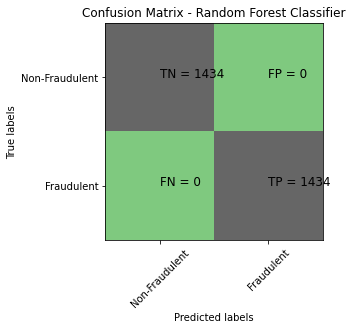

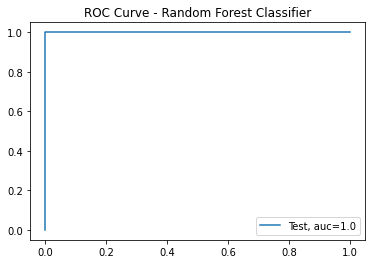

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(bootstrap = True,
                                max_features = 'sqrt', random_state=12)
rfc_model.fit(train_x,train_y)
pred5 = rfc_model.predict(test_x)
prob5 = rfc_model.predict_proba(test_x)
print_results("Random Forest Classifier", test_y, pred5,prob5[:,-1])


